In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import datetime as dt

# About Dataset :
"

Since 27.04.2016, I've been wearing Mi Band by Xiaomi every day.

This fitness tracker collects information about physical activity (steps, distance, calories, etc.) and sleep. Below you can find two datasets, one for steps and the other for sleep.

Current datasets are 27.04.2016 - 14.01.2023 (dd.mm.yyyy). In total 2454 days. I update the datasets approximately every 6 months.

Sometimes I did not sleep at night, plus Mi Band does not record sleep during the daytime.

"

The More Than 4 Years of Steps and Sleep Data (Mi Band) dataset from Kaggle contains data on the daily steps taken, calories burned, and distance covered by a person, as well as data on their sleep patterns over a four-year period. The data was collected using the Mi Band fitness tracker.

The dataset has two separate CSV files: one for steps data and one for sleep data. The steps data contains daily metrics on the number of steps taken, calories burned, and distance covered. The sleep data contains information on the start and end time of each period of sleep, the number of minutes spent asleep and awake during each period, and the number of times the sleeper woke up during the night.

In this presentation, we will explore this dataset and analyze the relationships between the different variables included in it. By doing so, we hope to gain insights into the participant's fitness levels and sleep patterns, as well as any trends or patterns that emerge over time. We will use Python and its various libraries, such as Pandas and Matplotlib, to process, visualize, and analyze the data. Ultimately, our goal is to develop a better understanding of how physical activity and sleep patterns influence each other, and what implications this might have for overall health and well-being.

In [4]:
df1 = pd.read_csv('01_Steps.csv')
df2 = pd.read_csv('02_Sleep.csv')

In [5]:
df1.head()

,date,steps,distance,runDistance,calories
0,2016-04-27,4948,3242,46,281
1,2016-04-28,16573,12060,79,751
2,2016-04-29,18002,12916,29,737
3,2016-04-30,4126,2981,11,207
4,2016-05-01,3869,2651,0,244


# Steps Dataset :

- steps : Number of steps
- distance : The distance covered (meters)
- runDistance : The distance covered while running (meters)
- calories : Calories burned

In [6]:
df2.head()

,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop
0,2016-04-27,0,0,0,1461708000,1461708000
1,2016-04-28,158,262,2,1461801240,1461826560
2,2016-04-29,234,241,0,1461883500,1461912000
3,2016-04-30,239,318,0,1461979500,1462012920
4,2016-05-01,180,333,3,1462065840,1462096800


# sleep Dataset :
- deepSleepTime : Deep sleep [minutes]
- shallowSleepTime : Shallow sleep [minutes]
- wakeTime : Time awake between sleeps [minutes]
- start : sleep time
- stop : wake up time

In [7]:
df = df1.merge(df2, on='date')
df=df.iloc[1:, :]

# Data preprocessing and Exploration :

## data preprocessing :

In [8]:
df.head()

,date,steps,distance,runDistance,calories,deepSleepTime,shallowSleepTime,wakeTime,start,stop
1,2016-04-28,16573,12060,79,751,158,262,2,1461801240,1461826560
2,2016-04-29,18002,12916,29,737,234,241,0,1461883500,1461912000
3,2016-04-30,4126,2981,11,207,239,318,0,1461979500,1462012920
4,2016-05-01,3869,2651,0,244,180,333,3,1462065840,1462096800
5,2016-05-02,10004,7330,0,426,52,83,0,1462147260,1462155360


In [9]:
# function to convert date 
def convert_date(x):
    if x.isnumeric():
        return dt.datetime.fromtimestamp(int(x))
    else :
        return dt.datetime.strptime(x[:-6],"%Y-%m-%d %H:%M:%S")

In [10]:
# Converting dates
df['start'] = df.start.apply(convert_date)
df['stop'] = df.stop.apply(convert_date)
df.date = pd.to_datetime(df.date)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453 entries, 1 to 2453
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2453 non-null   datetime64[ns]
 1   steps             2453 non-null   int64         
 2   distance          2453 non-null   int64         
 3   runDistance       2453 non-null   int64         
 4   calories          2453 non-null   int64         
 5   deepSleepTime     2453 non-null   int64         
 6   shallowSleepTime  2453 non-null   int64         
 7   wakeTime          2453 non-null   int64         
 8   start             2453 non-null   datetime64[ns]
 9   stop              2453 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(7)
memory usage: 210.8 KB


In [12]:
df.isna().sum()

date                0
steps               0
distance            0
runDistance         0
calories            0
deepSleepTime       0
shallowSleepTime    0
wakeTime            0
start               0
stop                0
dtype: int64

## Summary Statistics and Information :

In [13]:
df.describe()

,steps,distance,runDistance,calories,deepSleepTime,shallowSleepTime,wakeTime
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,8264.256828,5956.718712,827.304933,239.991439,106.581329,234.945373,4.309417
std,6667.943173,4872.810169,1826.682275,213.720296,72.514101,132.108384,24.561988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3224.000000,2227.000000,153.000000,90.000000,58.000000,187.000000,0.000000
50%,6986.000000,5011.000000,296.000000,190.000000,107.000000,262.000000,0.000000
75%,11046.000000,7994.000000,601.000000,309.000000,157.000000,323.000000,0.000000
max,38443.000000,29485.000000,21952.000000,2543.000000,384.000000,601.000000,604.000000


C:\Users\pc\AppData\Local\Temp\ipykernel_9084\753231175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['distance'])


<AxesSubplot:xlabel='distance', ylabel='Density'>

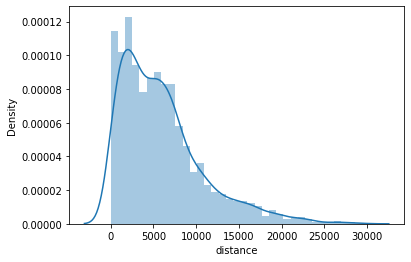

In [14]:
sns.distplot(df['distance'])

C:\Users\pc\AppData\Local\Temp\ipykernel_9084\1373677072.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['deepSleepTime'])


<AxesSubplot:xlabel='deepSleepTime', ylabel='Density'>

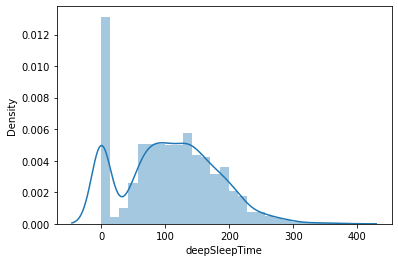

In [15]:
sns.distplot(df['deepSleepTime'])

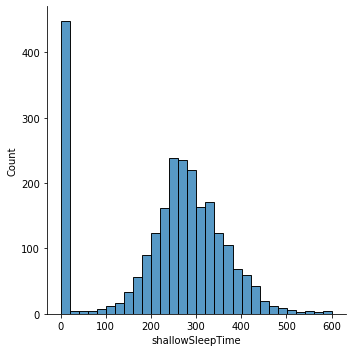

In [16]:
sns.displot(df['shallowSleepTime'])

<AxesSubplot:xlabel='deepSleepTime'>

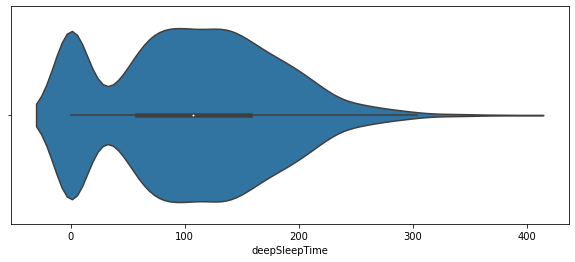

In [17]:
plt.figure(figsize=(10,4))
sns.violinplot(x = df.deepSleepTime)

<AxesSubplot:xlabel='shallowSleepTime'>

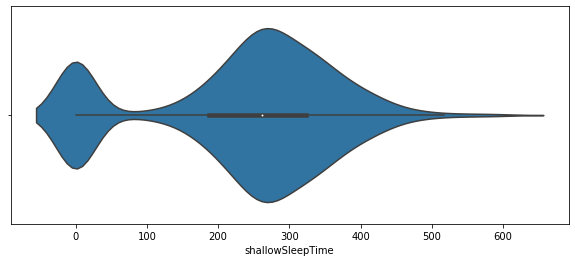

In [18]:
plt.figure(figsize=(10,4))
sns.violinplot(x = df.shallowSleepTime)

# exploring relationship between variables


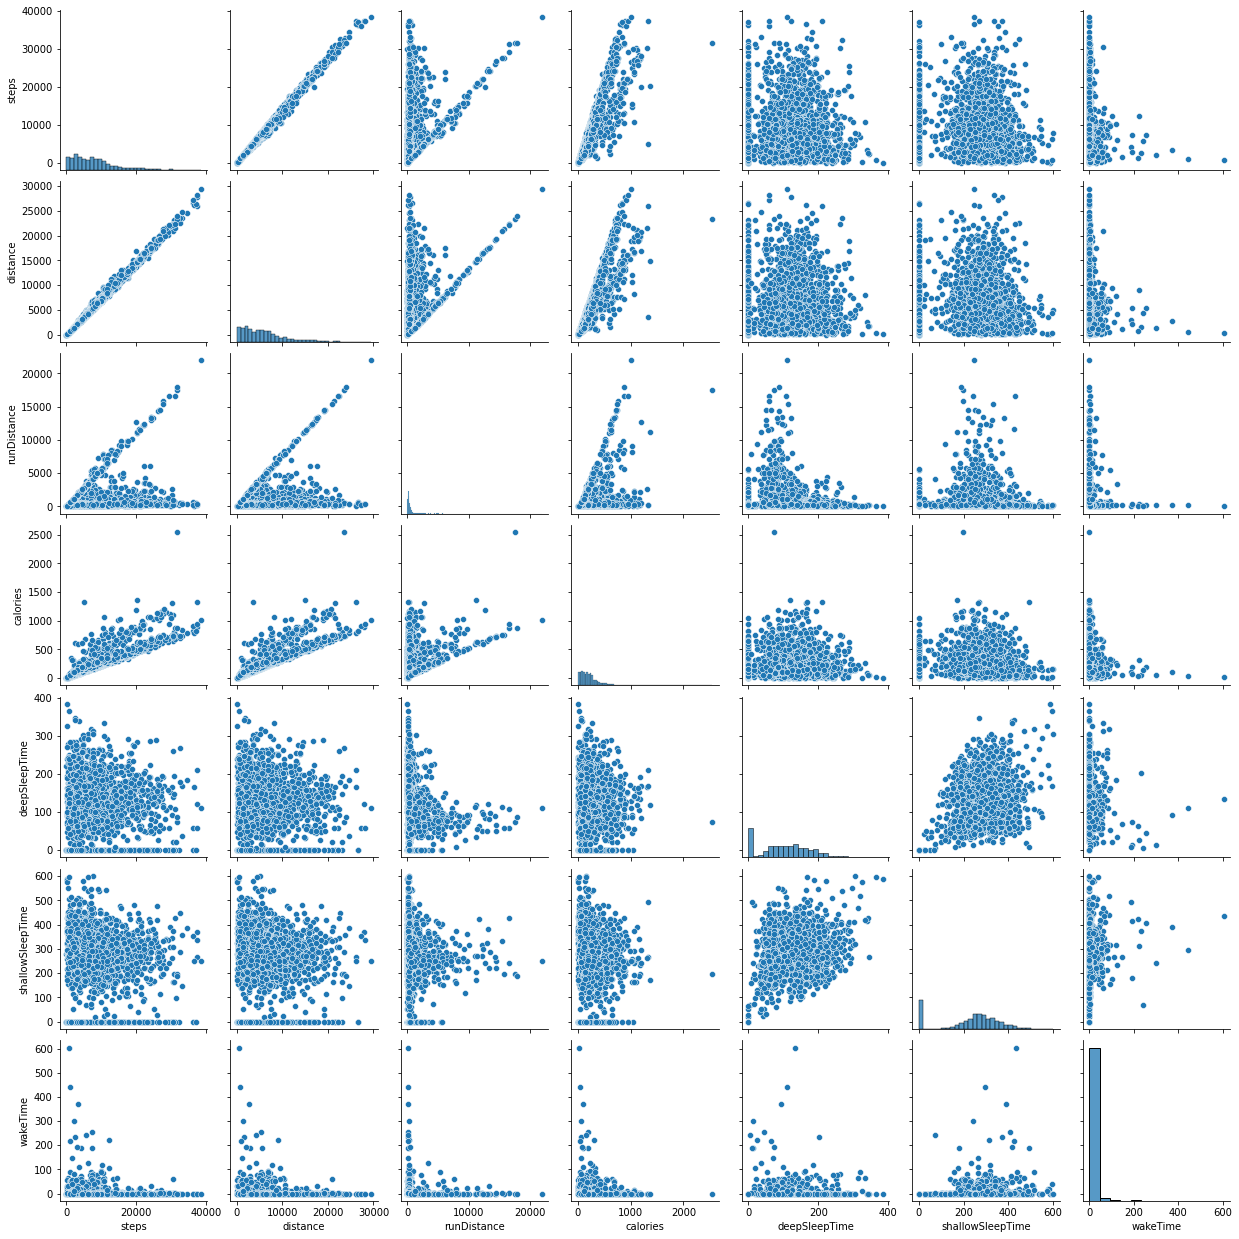

In [19]:
sns.pairplot(df)

# correlation :

C:\Users\pc\AppData\Local\Temp\ipykernel_9084\873664561.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


<AxesSubplot:>

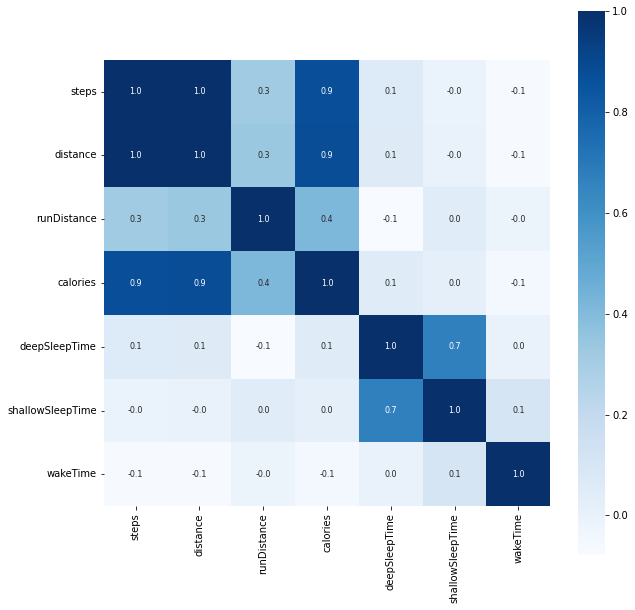

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# linear relationship between steps and calories

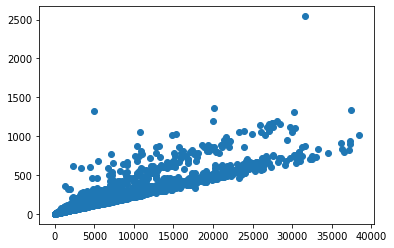

In [21]:
plt.scatter(df.steps, df.calories)

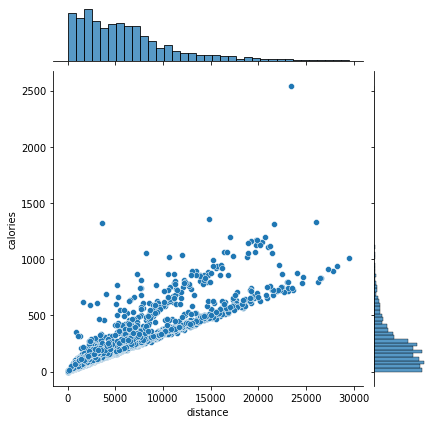

In [22]:
sns.jointplot(data=df, x='distance', y='calories')

<AxesSubplot:xlabel='distance'>

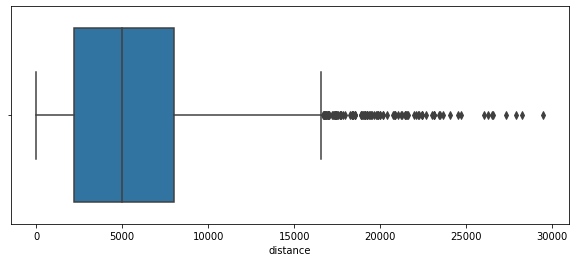

In [23]:
#Boxplot of distance
plt.figure(figsize=(10,4))
sns.boxplot(x=df.distance)

# Data Exploraion :

In [24]:
df.head()

,date,steps,distance,runDistance,calories,deepSleepTime,shallowSleepTime,wakeTime,start,stop
1,2016-04-28,16573,12060,79,751,158,262,2,2016-04-28 00:54:00,2016-04-28 07:56:00
2,2016-04-29,18002,12916,29,737,234,241,0,2016-04-28 23:45:00,2016-04-29 07:40:00
3,2016-04-30,4126,2981,11,207,239,318,0,2016-04-30 02:25:00,2016-04-30 11:42:00
4,2016-05-01,3869,2651,0,244,180,333,3,2016-05-01 02:24:00,2016-05-01 11:00:00
5,2016-05-02,10004,7330,0,426,52,83,0,2016-05-02 01:01:00,2016-05-02 03:16:00


# Splitting the date column into 3 columns

In [25]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [26]:
df.head()

,date,steps,distance,runDistance,calories,deepSleepTime,shallowSleepTime,wakeTime,start,stop,year,month,day
1,2016-04-28,16573,12060,79,751,158,262,2,2016-04-28 00:54:00,2016-04-28 07:56:00,2016,4,28
2,2016-04-29,18002,12916,29,737,234,241,0,2016-04-28 23:45:00,2016-04-29 07:40:00,2016,4,29
3,2016-04-30,4126,2981,11,207,239,318,0,2016-04-30 02:25:00,2016-04-30 11:42:00,2016,4,30
4,2016-05-01,3869,2651,0,244,180,333,3,2016-05-01 02:24:00,2016-05-01 11:00:00,2016,5,1
5,2016-05-02,10004,7330,0,426,52,83,0,2016-05-02 01:01:00,2016-05-02 03:16:00,2016,5,2


# calories burned per month :

In [27]:
calories = df[['calories', 'year', 'month']].groupby(['year', 'month']).agg('sum')

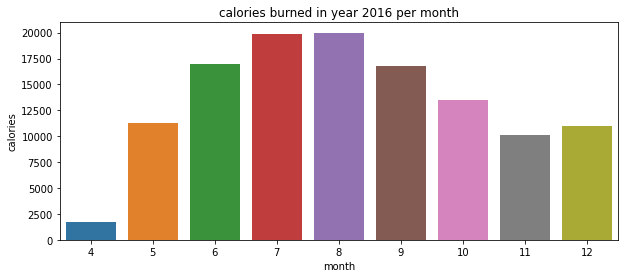

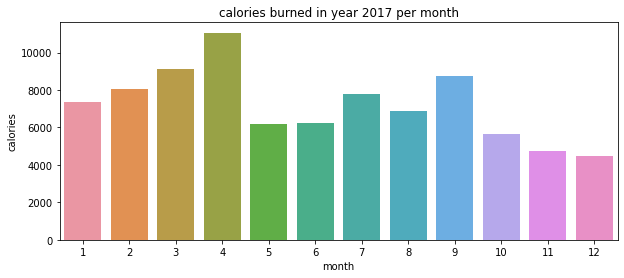

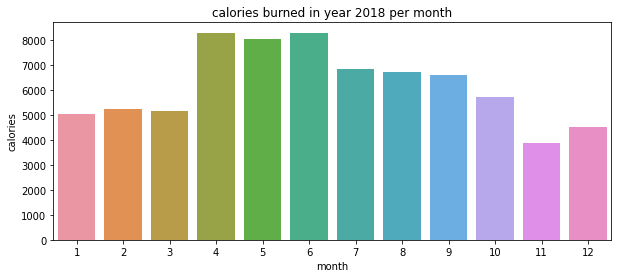

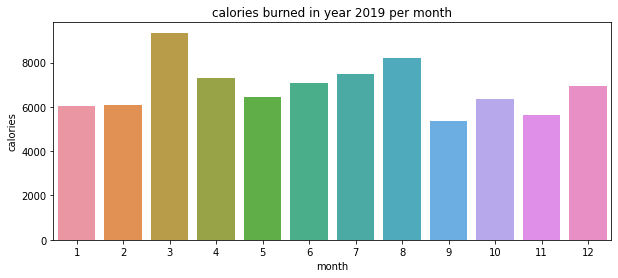

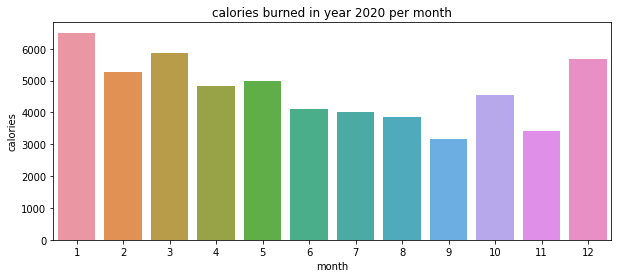

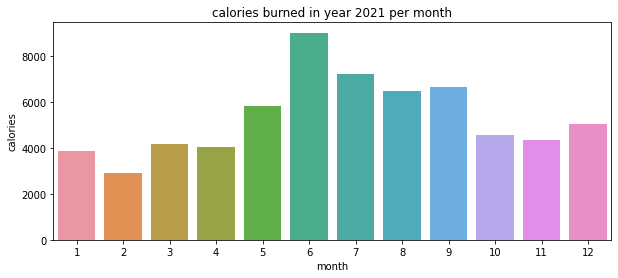

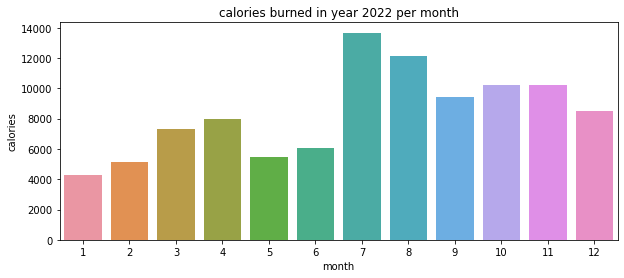

In [28]:
for i in range(2016,2023):

    plt.figure(figsize=(10,4))
    sns.barplot(x=calories.loc[i, :].index, y=calories.loc[i, :]['calories'])
    plt.title(f"calories burned in year {i} per month")

## calories burned per day in every month in 2022

In [29]:
calories = df[['calories', 'year', 'month', 'day']].groupby(['year', 'month', 'day']).agg('sum')

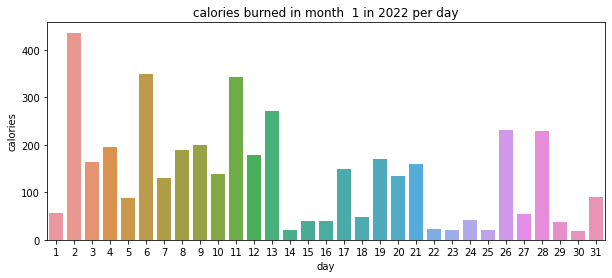

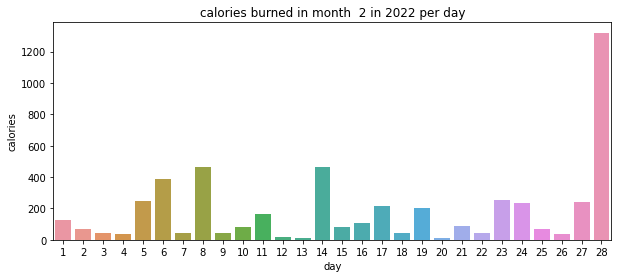

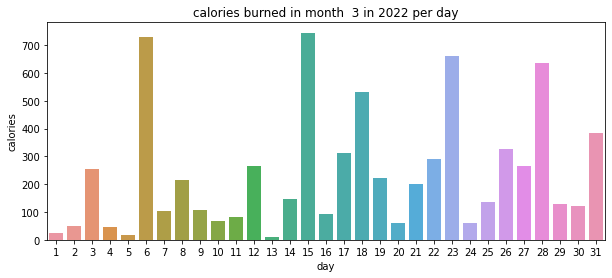

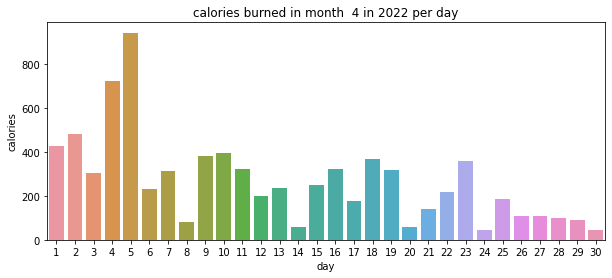

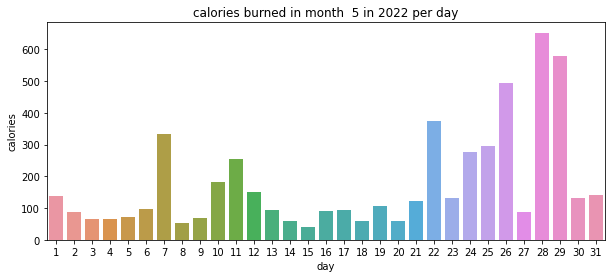

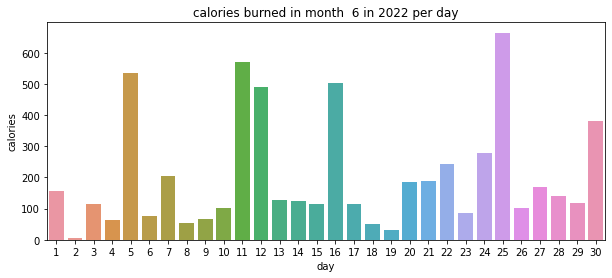

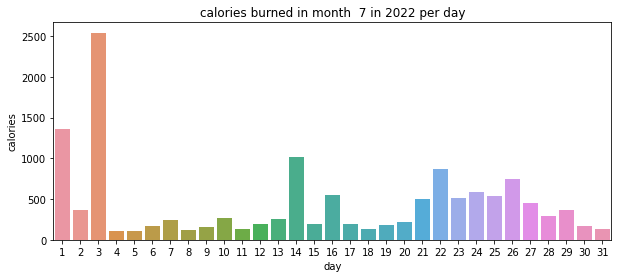

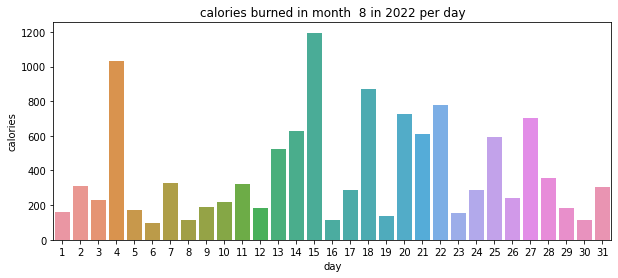

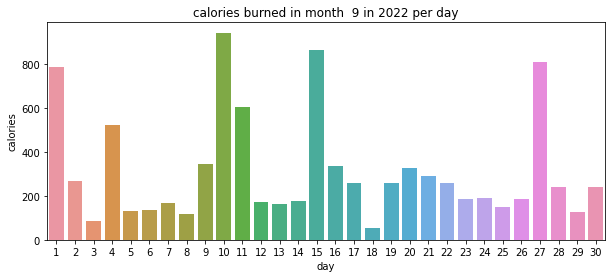

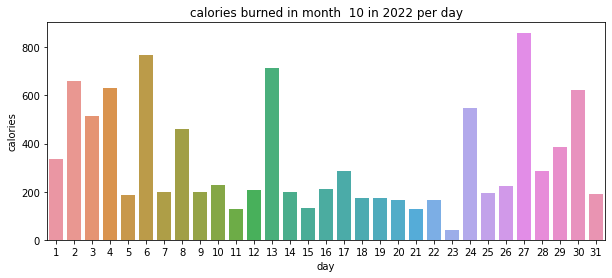

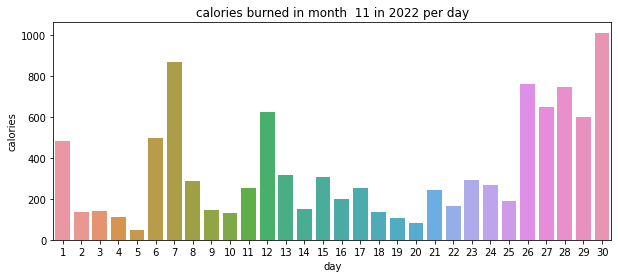

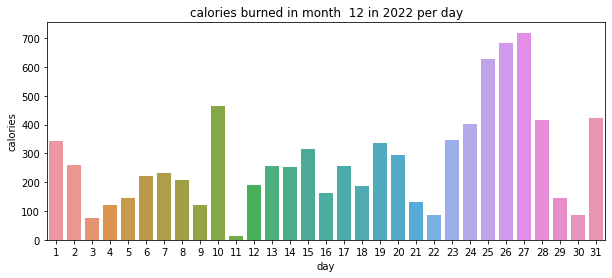

In [30]:
for i in range(1,13):
    calories.loc[(2022,1), :]
    plt.figure(figsize=(10,4))
    sns.barplot(x=calories.loc[(2022,i) , :].index, y=calories.loc[(2022,i), :]['calories'])
    plt.title(f"calories burned in month  {i} in 2022 per day")

## 

In [31]:
df.head()

,date,steps,distance,runDistance,calories,deepSleepTime,shallowSleepTime,wakeTime,start,stop,year,month,day
1,2016-04-28,16573,12060,79,751,158,262,2,2016-04-28 00:54:00,2016-04-28 07:56:00,2016,4,28
2,2016-04-29,18002,12916,29,737,234,241,0,2016-04-28 23:45:00,2016-04-29 07:40:00,2016,4,29
3,2016-04-30,4126,2981,11,207,239,318,0,2016-04-30 02:25:00,2016-04-30 11:42:00,2016,4,30
4,2016-05-01,3869,2651,0,244,180,333,3,2016-05-01 02:24:00,2016-05-01 11:00:00,2016,5,1
5,2016-05-02,10004,7330,0,426,52,83,0,2016-05-02 01:01:00,2016-05-02 03:16:00,2016,5,2


## hours of sleep per day :

In [32]:
a = df.stop - df.start 

In [33]:
a.apply(lambda x : x.total_seconds()/3600)

1       7.033333
2       7.916667
3       9.283333
4       8.600000
5       2.250000
          ...   
2449    6.600000
2450    6.250000
2451    6.166667
2452    7.083333
2453    8.950000
Length: 2453, dtype: float64

In [34]:
df['hours_sleeped'] = (df.stop - df.start).apply(lambda x : x.total_seconds()/3600) - df['wakeTime']/60

In [35]:
df.head()

,date,steps,distance,runDistance,calories,deepSleepTime,shallowSleepTime,wakeTime,start,stop,year,month,day,hours_sleeped
1,2016-04-28,16573,12060,79,751,158,262,2,2016-04-28 00:54:00,2016-04-28 07:56:00,2016,4,28,7.000000
2,2016-04-29,18002,12916,29,737,234,241,0,2016-04-28 23:45:00,2016-04-29 07:40:00,2016,4,29,7.916667
3,2016-04-30,4126,2981,11,207,239,318,0,2016-04-30 02:25:00,2016-04-30 11:42:00,2016,4,30,9.283333
4,2016-05-01,3869,2651,0,244,180,333,3,2016-05-01 02:24:00,2016-05-01 11:00:00,2016,5,1,8.550000
5,2016-05-02,10004,7330,0,426,52,83,0,2016-05-02 01:01:00,2016-05-02 03:16:00,2016,5,2,2.250000


C:\Users\pc\AppData\Local\Temp\ipykernel_9084\3945905552.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.hours_sleeped)


<AxesSubplot:xlabel='hours_sleeped', ylabel='Density'>

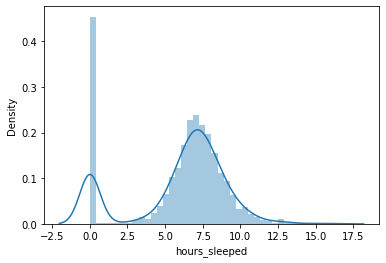

In [36]:
sns.distplot(df.hours_sleeped)

In [37]:
df[df['hours_sleeped']==0]

,date,steps,distance,runDistance,calories,deepSleepTime,shallowSleepTime,wakeTime,start,stop,year,month,day,hours_sleeped
9,2016-05-06,7964,5736,209,345,0,0,0,2016-05-05 23:00:00,2016-05-05 23:00:00,2016,5,6,0.0
29,2016-05-26,15682,11175,133,667,0,0,0,2016-05-25 23:00:00,2016-05-25 23:00:00,2016,5,26,0.0
37,2016-06-03,5117,3402,49,245,0,0,0,2016-06-02 23:00:00,2016-06-02 23:00:00,2016,6,3,0.0
40,2016-06-06,7644,5372,0,366,0,0,0,2016-06-05 23:00:00,2016-06-05 23:00:00,2016,6,6,0.0
57,2016-06-23,30013,21454,0,1051,0,0,0,2016-06-22 23:00:00,2016-06-22 23:00:00,2016,6,23,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,2022-05-07,13515,9842,407,332,0,0,0,2022-05-05 23:00:00,2022-05-05 23:00:00,2022,5,7,0.0
2382,2022-11-04,2922,1894,1613,110,0,0,0,2022-11-04 23:00:00,2022-11-04 23:00:00,2022,11,4,0.0
2400,2022-11-22,3733,2497,2126,167,0,0,0,2022-11-22 23:00:00,2022-11-22 23:00:00,2022,11,22,0.0
2409,2022-12-01,9951,7285,5589,344,0,0,0,2022-12-01 23:00:00,2022-12-01 23:00:00,2022,12,1,0.0


# Dealing with 0 in sleeping  
as mentiened in description of the dataset :
"sometimes I did not sleep at night, plus Mi Band does not record sleep during the daytime" that is why there is 0 in hours_sleeped


As a solution I will replace 0 with the sleep time of the next day

In [38]:
df.hours_sleeped = df.hours_sleeped.replace(0,None)
df.hours_sleeped = df.hours_sleeped.fillna(method='ffill')

In [39]:
df[df['hours_sleeped']==0]

,date,steps,distance,runDistance,calories,deepSleepTime,shallowSleepTime,wakeTime,start,stop,year,month,day,hours_sleeped


C:\Users\pc\AppData\Local\Temp\ipykernel_9084\3945905552.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.hours_sleeped)


<AxesSubplot:xlabel='hours_sleeped', ylabel='Density'>

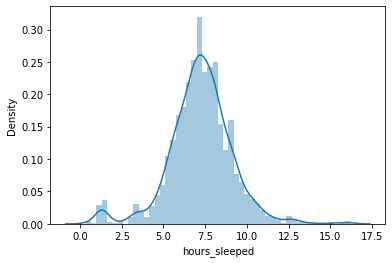

In [40]:
sns.distplot(df.hours_sleeped)

## Feature Selection and Data Reduction :


In [41]:
X = df.drop(['deepSleepTime', 'deepSleepTime', 'wakeTime', 'start', 'stop', 'calories', 'date'], axis=1)
Y = df.calories

In [42]:
X.head()

,steps,distance,runDistance,shallowSleepTime,year,month,day,hours_sleeped
1,16573,12060,79,262,2016,4,28,7.000000
2,18002,12916,29,241,2016,4,29,7.916667
3,4126,2981,11,318,2016,4,30,9.283333
4,3869,2651,0,333,2016,5,1,8.550000
5,10004,7330,0,83,2016,5,2,2.250000


In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [45]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data_scaled)

In [46]:
print("Pourcentage de variance expliquée : ")
print(pca.explained_variance_ratio_)
print("Composantes principales : ")
print(pca.components_)

Pourcentage de variance expliquée : 
[0.28303217 0.18260158]
Composantes principales : 
[[ 0.64559329  0.64643184  0.31077915 -0.05047766 -0.1770267   0.03645517
   0.05472518 -0.17476047]
 [ 0.07793374  0.07803947  0.02206524  0.68887813 -0.18085547  0.20957646
   0.0477496   0.65869963]]



Shape : (2453, 0)
Pourcentages de variance expliquée :
Variance totale expliquée : 0.00%

Shape : (2453, 1)
Pourcentages de variance expliquée :28.30%  
Variance totale expliquée : 28.30%

Shape : (2453, 2)
Pourcentages de variance expliquée :28.30%  18.26%  
Variance totale expliquée : 46.56%

Shape : (2453, 3)
Pourcentages de variance expliquée :28.30%  18.26%  15.99%  
Variance totale expliquée : 62.55%

Shape : (2453, 4)
Pourcentages de variance expliquée :28.30%  18.26%  15.99%  12.85%  
Variance totale expliquée : 75.40%

Shape : (2453, 5)
Pourcentages de variance expliquée :28.30%  18.26%  15.99%  12.85%  12.38%  
Variance totale expliquée : 87.78%

Shape : (2453, 6)
Pourcentages de variance expliquée :28.30%  18.26%  15.99%  12.85%  12.38%  6.59%  
Variance totale expliquée : 94.36%

Shape : (2453, 7)
Pourcentages de variance expliquée :28.30%  18.26%  15.99%  12.85%  12.38%  6.59%  5.61%  
Variance totale expliquée : 99.98%

Shape : (2453, 8)
Pourcentages de variance expliqué

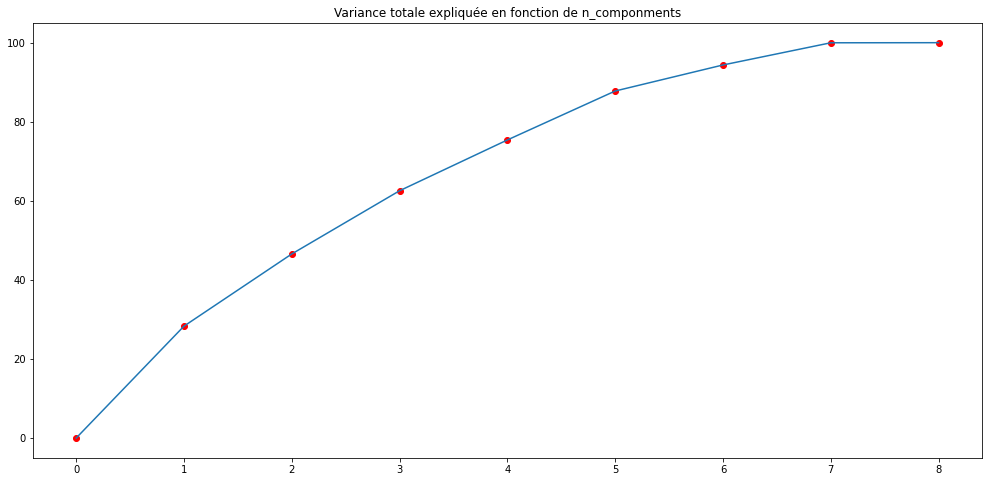

In [47]:
variance_totale = []

for i in range(9):
    pca = PCA(i)
    reduced_data = pca.fit_transform(data_scaled)
    print("\nShape : {}".format(reduced_data.shape))
    s = "{:.2f}%  "*(i)
    print("Pourcentages de variance expliquée :"+s.format(*pca.explained_variance_ratio_*100))
    variance = pca.explained_variance_ratio_.sum()*100
    variance_totale.append(variance)
    print("Variance totale expliquée : {:.2f}%".format(variance))

plt.figure(figsize=(17,8))
plt.plot(variance_totale)
plt.scatter(np.arange(9), variance_totale, color='red')
#plt.axhline(90, linestyle='--')
plt.title("Variance totale expliquée en fonction de n_componments")
plt.show()

In [48]:
pca = PCA(n_components=6)
reduced_features = pca.fit_transform(data_scaled)

# Model Building Training and Testing :

In [49]:
x_train, x_test, y_train, y_test = train_test_split(reduced_features, Y, test_size = 0.2, random_state=0)

In [50]:
print(reduced_features.shape, x_train.shape, x_test.shape)

(2453, 6) (1962, 6) (491, 6)


## Testing Multiple Models

In [55]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()
]

# Loop over each model and evaluate its performance
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    score=r2_score(y_test, y_pred)
    print('Mean Squared Error:', mse)
    print('R-squared:', score)
    print('--------------------------')

Mean Squared Error: 11365.458462423665
R-squared: 0.7675249889320093
--------------------------
Mean Squared Error: 11439.21020974212
R-squared: 0.7660164322529429
--------------------------
Mean Squared Error: 11366.25421491098
R-squared: 0.7675087121958876
--------------------------
Mean Squared Error: 31137.80372953354
R-squared: 0.363091133491101
--------------------------
Mean Squared Error: 17249.68635437882
R-squared: 0.647165924770057
--------------------------
Mean Squared Error: 11177.11837209776
R-squared: 0.7713773953024008
--------------------------
Mean Squared Error: 10277.602973825184
R-squared: 0.7897765520861433
--------------------------
Mean Squared Error: 10237.593253233536
R-squared: 0.7905949317641934
--------------------------


## Finding best parameters for XGBRegressor

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}

In [64]:
xgb_model = XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10)
grid_search.fit(x_train, y_train)

In [61]:
print('Best parameters:', grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [63]:
model=XGBRegressor(learning_rate=0.1,max_depth=3,n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', score)

Mean Squared Error: 10229.595583352182
R-squared: 0.7907585202723326


# What's Next :


## We can improve the prediction with adding more feature like heart beat and temperature